# Numerical Integration

Consider the equation 
\begin{equation}f(x) = \frac{A_{0}}{2} + \sum_{n=1}^{\infty} A_{n}\cos(nx) + B_{n}\sin(nx).\end{equation}
The above equation is the sine-cosine form of the *Fourier series*. It is well known that the values $A_{n}$ and $B_{n}$ above can be computed using the following equations: 
\begin{equation}A_{n}= \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(nx)\ dx \hspace{2mm} \text{and} \hspace{2mm} B_{n} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(nx)\ dx.\end{equation}
Moreover, notice from the two above equations that we obtain
\begin{equation}A_{0} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(0)\ dx = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\ dx,\end{equation}
and 
\begin{equation}B_{0} = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(0)\ dx = 0.\end{equation}
Then, $A_{0}$ becomes 
\begin{equation}\frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)\ dx.\end{equation}
This observation will be important later. 

Similar to Taylor series, Fourier series can be used to approximate functions. Step functions are specific examples of functions which are best suited to be approximated by using Fourier series. In addition, Fourier series also form the basis of many engineering applications such as signal processing.

The function `my_fourier_coeff(f,n)` provides output $[A_{n},B_{n}]$, where $f$ is assumed to be a $2\pi$-periodic function object. Additionally, the function `my_fourier_coeff` computes the n-th Fourier coefficients, $A_{n}$ and $B_{n}$, in the Fourier series for $f$ defined by the two formulas given earlier. Scipy's quad is used to integrate the given test values by considering the above cases which depend on the value of $n$. In particular, if $n\geq 1$, then the first two integrals are used to obtain the coefficients. On the other hand, if $n=0$, then the integral previously derived for the $A_{0}$ coefficient will be used. 

In [1]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [2]:
def fourier_coeff(f,n):
    An = []
    Bn = []
    if n == 0:
            coeffAn = (1.0/(2.0*np.pi))*integrate.quad(lambda x:f(x),-np.pi,np.pi)[0]
            An.append(coeffAn)
            coeffBn = 0.0
            Bn.append(coeffBn)
    else:
        for i in range(1,n+1):
            coeffAn = (1.0/np.pi)*integrate.quad(lambda x:f(x)*np.cos(i*x),-np.pi,np.pi)[0]
            An.append(coeffAn)
            coeffBn = (1.0/np.pi)*integrate.quad(lambda x:f(x)*np.sin(i*x),-np.pi,np.pi)[0]
            Bn.append(coeffBn)
    return [An[-1], Bn[-1]]

Test Cases:

Use the following plotting function to plot the analytic and approximation of functions using the fourier series.

In [3]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = fourier_coeff(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = fourier_coeff(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()

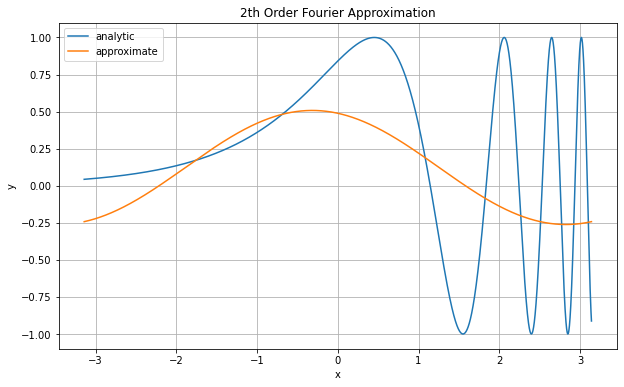

In [4]:
f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)

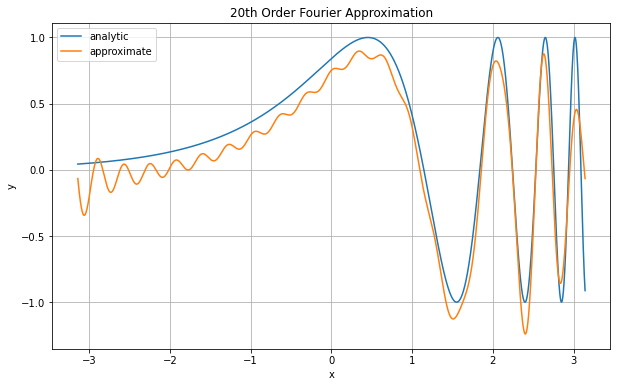

In [5]:
N = 20
plot_results(f, N)

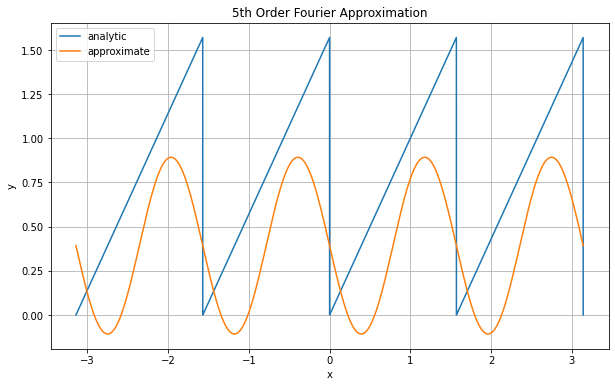

In [6]:
f = lambda x: np.mod(x, np.pi/2)
N = 5
plot_results(f, N)

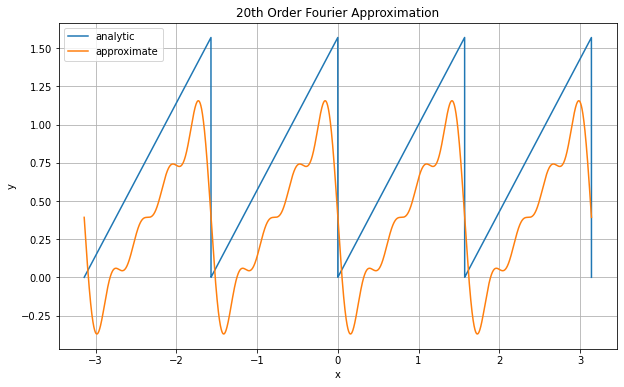

In [7]:
N = 20
plot_results(f, N)

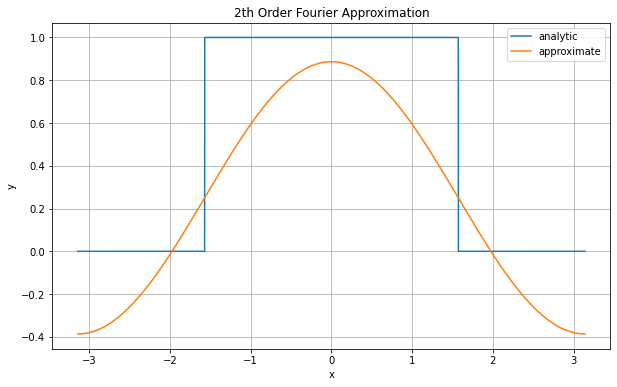

In [8]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2
plot_results(f, N)

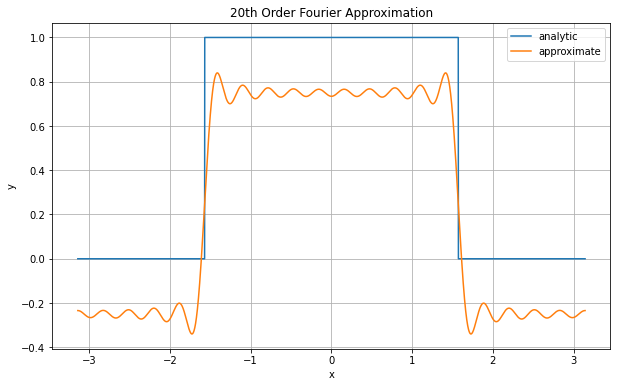

In [9]:
N = 20
plot_results(f, N)